<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/Another_copy_of_R_SVM_EffB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.efficientnet import EfficientNetB2, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_700/Train'
test_dir = '/content/drive/MyDrive/DR_700/Test'

Mounted at /content/drive


In [3]:
# Load model for feature extraction
model = EfficientNetB2(weights='imagenet', include_top=False)


31790344/31790344 [==============================] - 0s 0us/step


In [4]:
# Function to extract features from an image using EfficientNetB3
def extract_features_efficientnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features

In [7]:
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

1/1 [==============================] - 0s 122ms/step


In [8]:
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

1/1 [==============================] - 0s 124ms/step


In [9]:
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()

Training SVM with linear kernel...
Performance metrics for linear kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



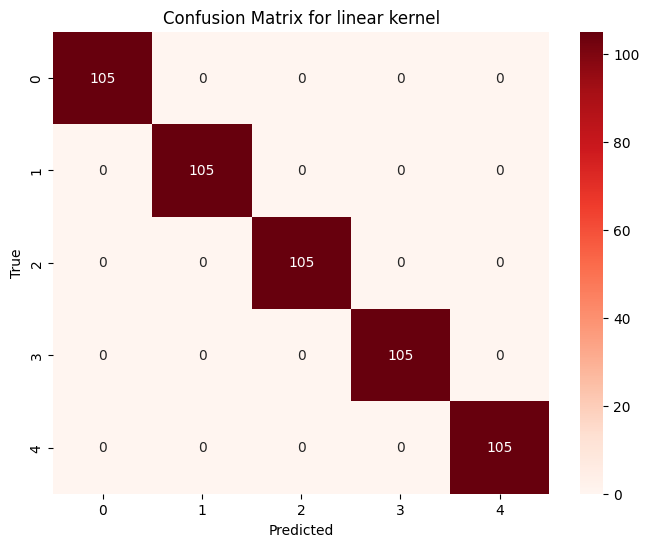

Training SVM with poly kernel...
Performance metrics for poly kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.80       105
           1       0.74      0.89      0.81       105
           2       0.82      0.67      0.74       105
           3       0.79      0.80      0.80       105
           4       0.74      0.86      0.79       105

    accuracy                           0.79       525
   macro avg       0.80      0.79      0.79       525
weighted avg       0.80      0.79      0.79       525

Accuracy: 0.7866666666666666
Sensitivity: 0.7866666666666666
Precision: 0.7951006656627937
F1 Score: 0.7854017002876956



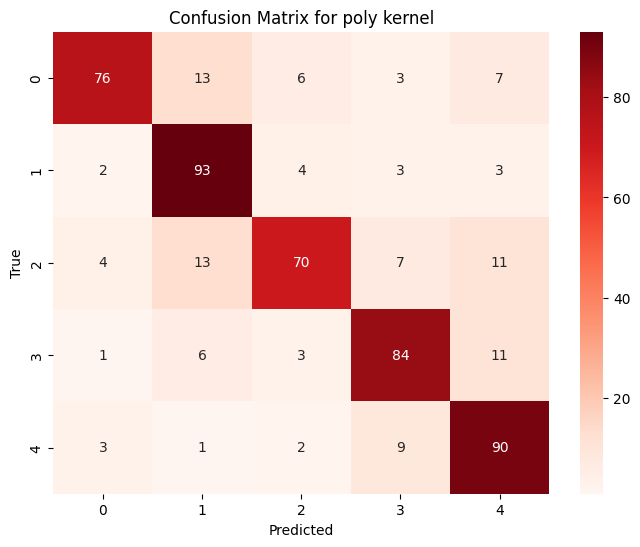

Training SVM with rbf kernel...
Performance metrics for rbf kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       105
           1       0.59      0.82      0.68       105
           2       0.65      0.48      0.55       105
           3       0.69      0.71      0.70       105
           4       0.70      0.76      0.73       105

    accuracy                           0.67       525
   macro avg       0.68      0.67      0.66       525
weighted avg       0.68      0.67      0.66       525

Accuracy: 0.6685714285714286
Sensitivity: 0.6685714285714286
Precision: 0.6794662021170654
F1 Score: 0.6639076396085741



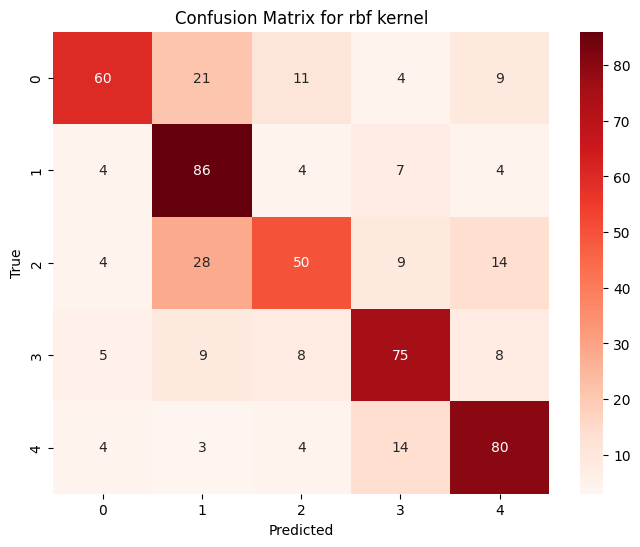

Training SVM with sigmoid kernel...
Performance metrics for sigmoid kernel:
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.42      0.49       105
           1       0.37      0.64      0.47       105
           2       0.34      0.21      0.26       105
           3       0.52      0.49      0.50       105
           4       0.59      0.61      0.60       105

    accuracy                           0.47       525
   macro avg       0.48      0.47      0.46       525
weighted avg       0.48      0.47      0.46       525

Accuracy: 0.4723809523809524
Sensitivity: 0.4723809523809524
Precision: 0.4830203833555789
F1 Score: 0.46464271883905023



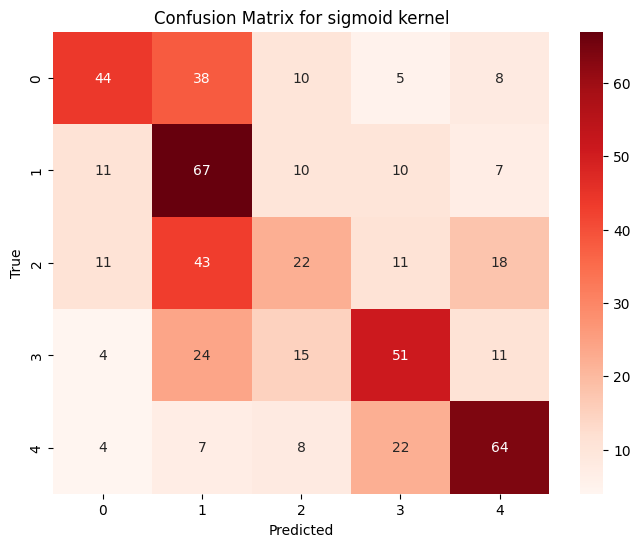

Training SVM with polynomial_exponential kernel...
Performance metrics for polynomial_exponential kernel:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



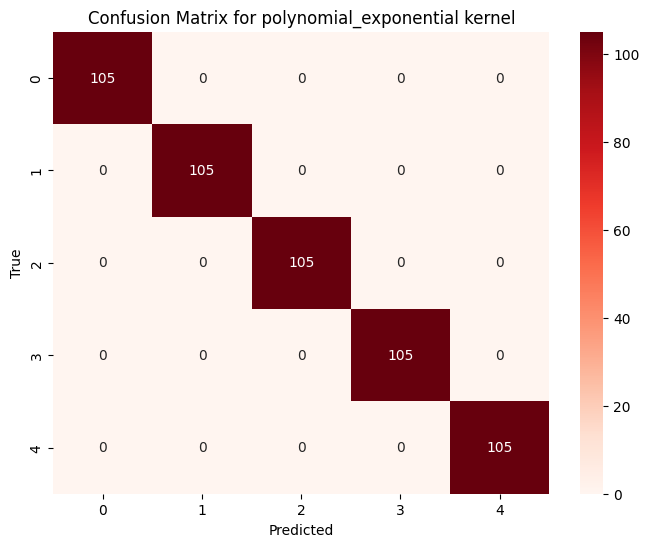

In [10]:
import matplotlib.pyplot as plt
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# List of kernels to try
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'polynomial_exponential']

for kernel in kernels:
    print(f"\033[1mTraining SVM with {kernel} kernel...\033[0m")

    # Train SVM classifier
    if kernel == 'polynomial_exponential':
        clf = svm.SVC(kernel='precomputed')
        # Pre-compute the kernel matrix
        gram_train = np.dot(x_train_flat, x_train_flat.T)
        clf.fit(gram_train, y_train)
        gram_test = np.dot(x_test_flat, x_train_flat.T)
    else:
        clf = svm.SVC(kernel=kernel)
        clf.fit(x_train_flat, y_train)

    # Predict on test set
    if kernel == 'polynomial_exponential':
        y_pred = clf.predict(gram_test)
    else:
        y_pred = clf.predict(x_test_flat)

    # Print performance metrics
    print(f'Performance metrics for {kernel} kernel:')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred))

    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')

    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    import seaborn as sns

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {kernel} kernel')
    plt.show()